Best parameters (RandomizedSearchCV): {'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': False}
Best score (RandomizedSearchCV): 0.26113711835896053

RandomizedSearchCV Test MSE: 0.2415
RandomizedSearchCV Test R2: 0.8160


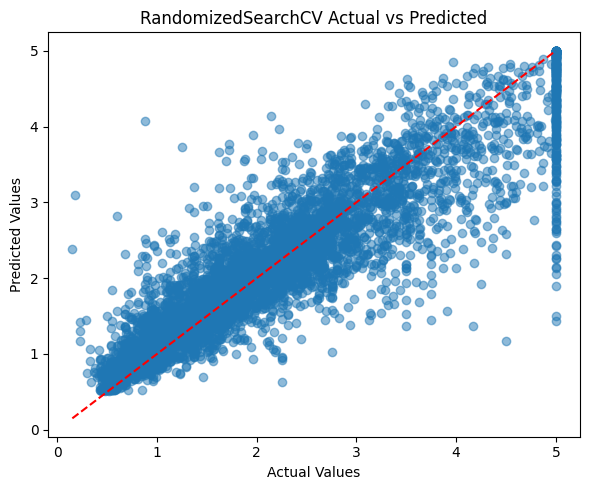

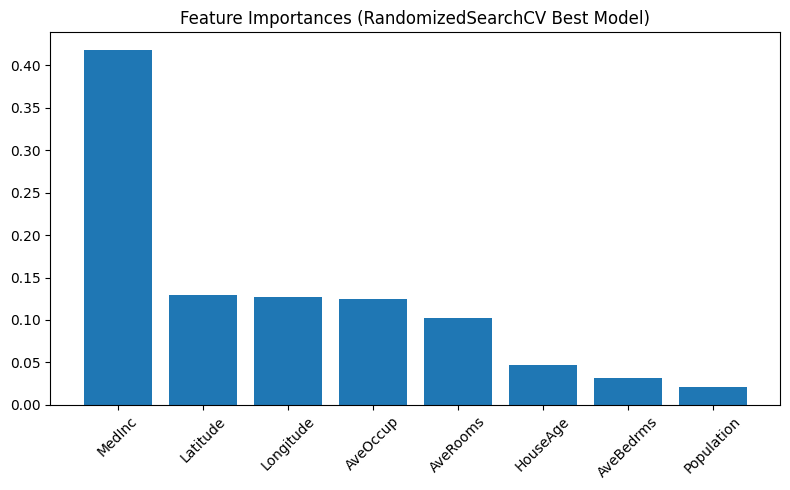

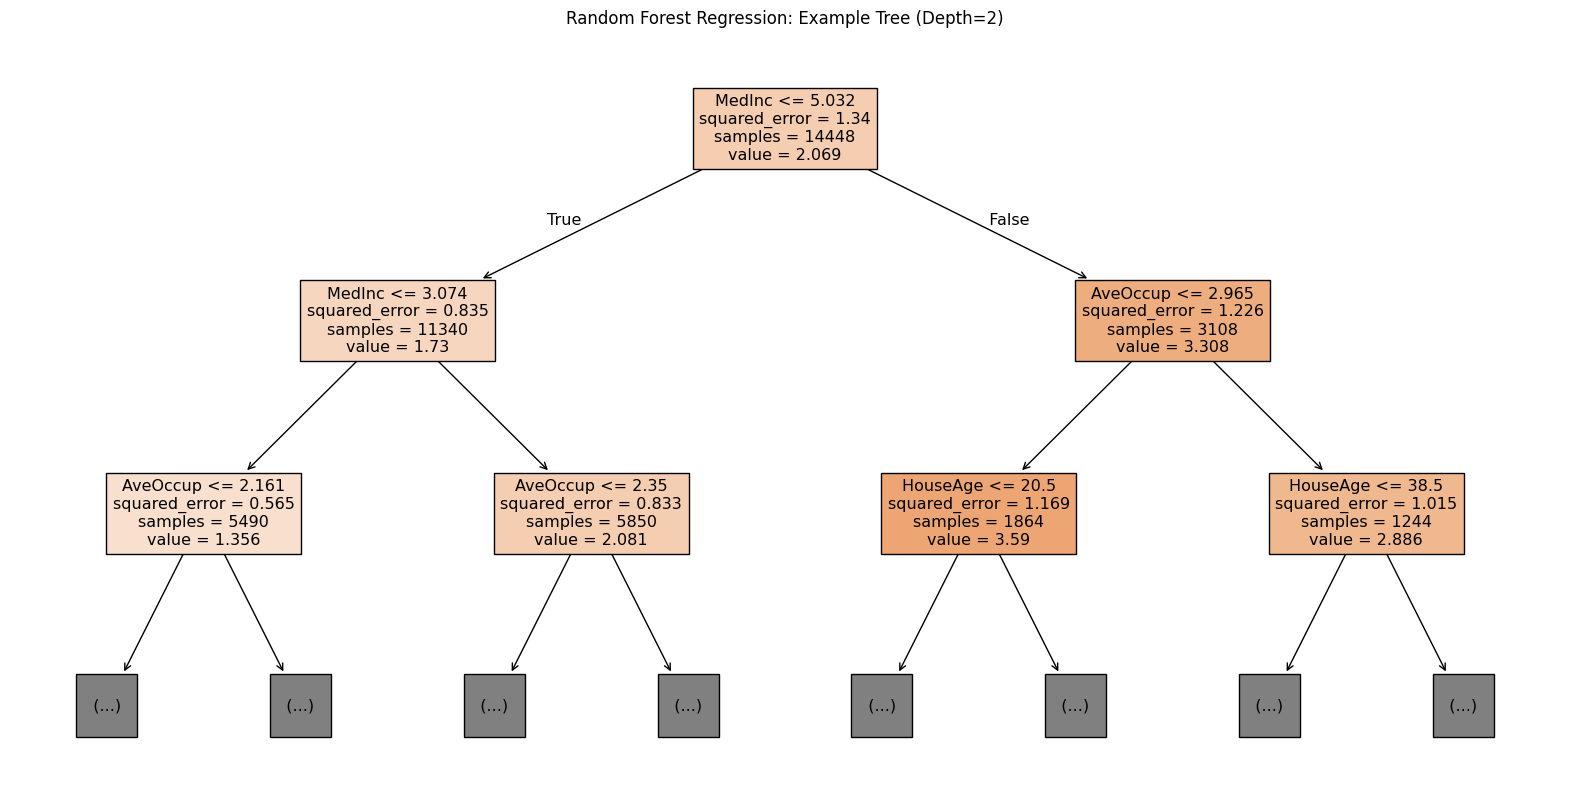

In [ ]:
# - Random Forest Regression on California Housing Dataset
# - RandomizedSearchCV vs GridSearchCV:
# - GridSearchCV exhaustively tries every combination of hyperparameters in the provided grid.
# - RandomizedSearchCV samples a fixed number of random combinations from the grid, making it faster for large search spaces.
# - Both are used for hyperparameter optimization, but RandomizedSearchCV is more efficient when the grid is large or when you want a quick search.

import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations
from sklearn.datasets import fetch_california_housing  # To load the dataset
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  # For splitting and hyperparameter search
from sklearn.ensemble import RandomForestRegressor  # Random Forest regression model
from sklearn.metrics import mean_squared_error, r2_score  # For regression metrics
import warnings  # To suppress warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

# Load California housing dataset
cal_data = fetch_california_housing()  # Fetch the dataset
X = pd.DataFrame(cal_data.data, columns=cal_data.feature_names)  # Features as DataFrame
y = cal_data.target  # Target variable (median house value)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Split data into train and test sets

# Fixed lists for hyperparameters
param_list = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 15, None],  # Maximum depth of the tree
    'min_samples_split': [2, 4, 6, 8],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 3],  # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}

# RandomizedSearchCV for Random Forest Regressor
rf = RandomForestRegressor(random_state=42)  # Initialize Random Forest Regressor
random_search = RandomizedSearchCV(
    rf, param_distributions=param_list, n_iter=20, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)  # Randomized hyperparameter search
random_search.fit(X_train, y_train)  # Fit model to training data
print('Best parameters (RandomizedSearchCV):', random_search.best_params_)  # Print best parameters
print('Best score (RandomizedSearchCV):', -random_search.best_score_)  # Print best score (MSE)
rf_random = random_search.best_estimator_  # Get best model

# GridSearchCV for Random Forest Regressor (commented out)
# grid_search = GridSearchCV(
#     rf, param_grid=param_list, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)  # Grid hyperparameter search
# grid_search.fit(X_train, y_train)  # Fit model to training data
# print('Best parameters (GridSearchCV):', grid_search.best_params_)  # Print best parameters
# print('Best score (GridSearchCV):', -grid_search.best_score_)  # Print best score (MSE)
# rf_grid = grid_search.best_estimator_  # Get best model

# Evaluate RandomizedSearchCV model
y_pred = rf_random.predict(X_test)  # Predict on test set
mse = mean_squared_error(y_test, y_pred)  # Calculate mean squared error
r2 = r2_score(y_test, y_pred)  # Calculate R^2 score
print(f'\nRandomizedSearchCV Test MSE: {mse:.4f}')  # Print test MSE
print(f'RandomizedSearchCV Test R2: {r2:.4f}')  # Print test R^2
plt.figure(figsize=(6,5))  # Set figure size
plt.scatter(y_test, y_pred, alpha=0.5)  # Scatter plot of actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal reference line
plt.xlabel('Actual Values')  # X-axis label
plt.ylabel('Predicted Values')  # Y-axis label
plt.title('RandomizedSearchCV Actual vs Predicted')  # Plot title
plt.tight_layout()  # Adjust layout
plt.show()  # Show plot

# Feature importance visualization for best RandomizedSearchCV model
importances = rf_random.feature_importances_  # Get feature importances
indices = np.argsort(importances)[::-1]  # Sort features by importance
plt.figure(figsize=(8,5))  # Set figure size
plt.bar(range(X.shape[1]), importances[indices], align='center')  # Bar plot of importances
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=45)  # Feature names as x-ticks
plt.title('Feature Importances (RandomizedSearchCV Best Model)')  # Plot title
plt.tight_layout()  # Adjust layout
plt.show()  # Show plot

# Visualize a single tree from the Random Forest
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(rf_random.estimators_[0], feature_names=X.columns, filled=True, max_depth=2)
plt.title('Random Forest Regression: Example Tree (Depth=2)')
plt.show()

This cell loads the California Housing dataset, splits it into training and testing sets, defines a dictionary of hyperparameters for a Random Forest Regressor, and then uses RandomizedSearchCV to find the best hyperparameters for the model. It also prints the best parameters and the best cross-validation score.

Test Accuracy: 0.8022388059701493
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       165
           1       0.78      0.67      0.72       103

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



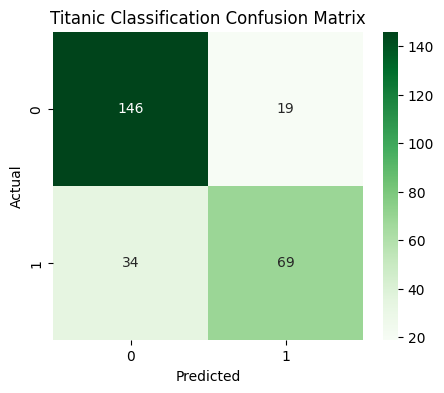

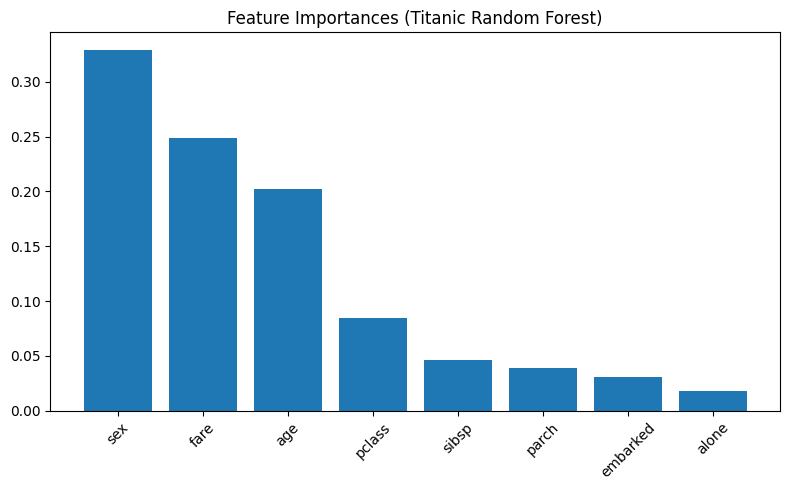

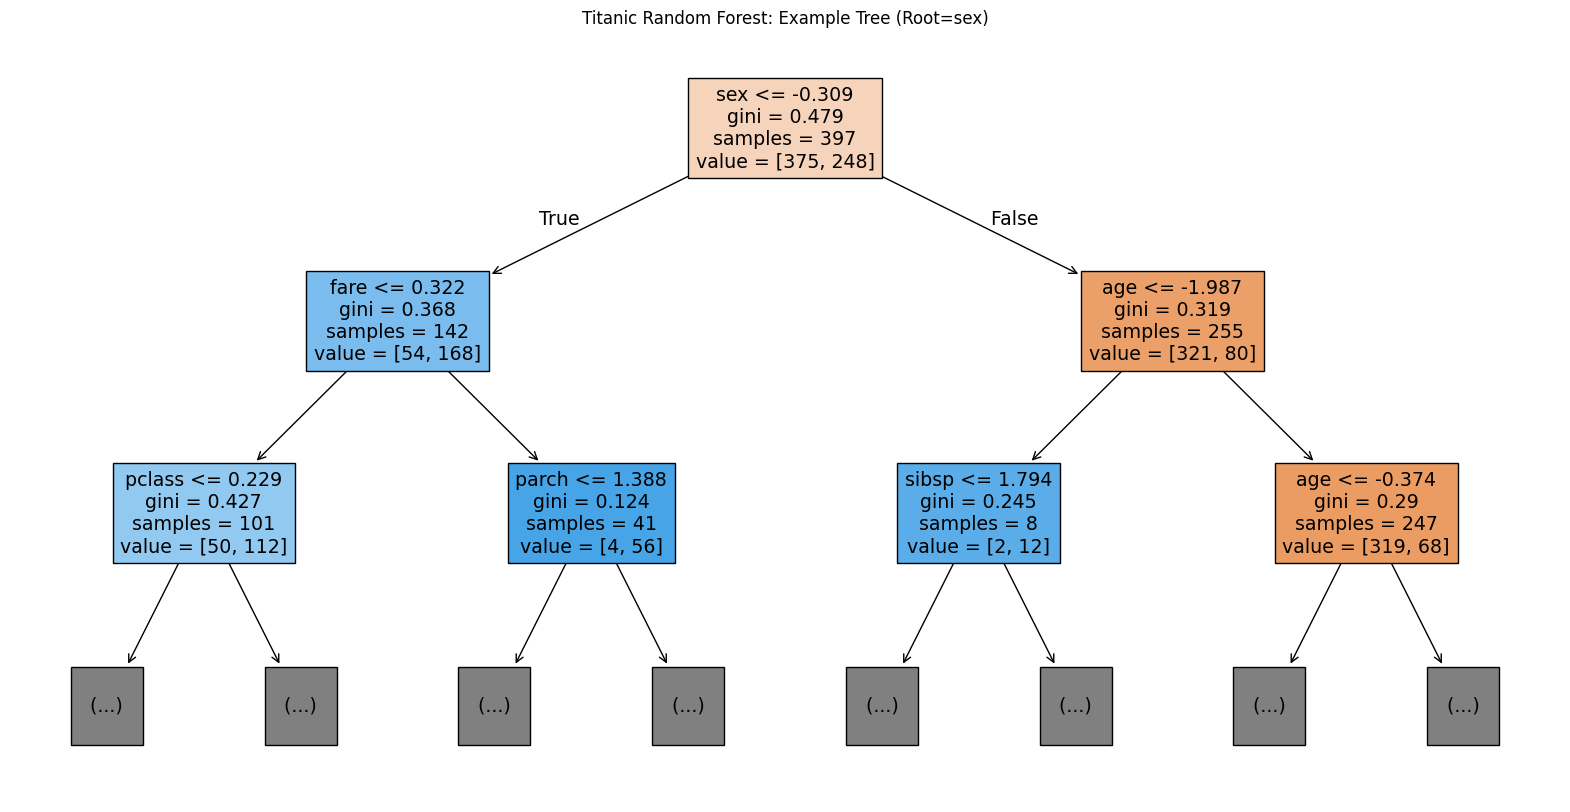

In [ ]:
# Titanic Classification with Random Forest (Simplified)
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load and preprocess Titanic dataset
X = sns.load_dataset('titanic').drop(['survived', 'deck', 'embark_town', 'alive', 'class', 'who'], axis=1)
X['age'] = X['age'].fillna(X['age'].median())
X['fare'] = X['fare'].fillna(X['fare'].median())
X['embarked'] = X['embarked'].fillna(X['embarked'].mode()[0])
X['alone'] = X['alone'].fillna(X['alone'].mode()[0])
for col in ['sex', 'embarked', 'alone']:
    X[col] = LabelEncoder().fit_transform(X[col])
X = X.drop(['adult_male'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = sns.load_dataset('titanic')['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Random Forest with RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=15, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
rf_best = random_search.best_estimator_

# Evaluation
y_pred = rf_best.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,5))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=45)
plt.title('Feature Importances (Titanic Random Forest)')
plt.tight_layout()
plt.show()

# Visualize tree with most important root split
root_feature = indices[0]
tree_idx = next((i for i, est in enumerate(rf_best.estimators_) if est.tree_.feature[0] == root_feature), 0)
plt.figure(figsize=(20,10))
plot_tree(rf_best.estimators_[tree_idx], feature_names=X.columns, filled=True, max_depth=2)
plt.title(f'Titanic Random Forest: Example Tree (Root={X.columns[root_feature]})')
plt.show()

This code performs a simplified Titanic classification using a Random Forest model. It loads and preprocesses the Titanic dataset, splits the data, uses RandomizedSearchCV to find the best hyperparameters for the Random Forest Classifier, evaluates the model, and visualizes the confusion matrix and feature importances. It also visualizes one of the decision trees from the forest.

Optimal k: 14
Test Accuracy: 0.9556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



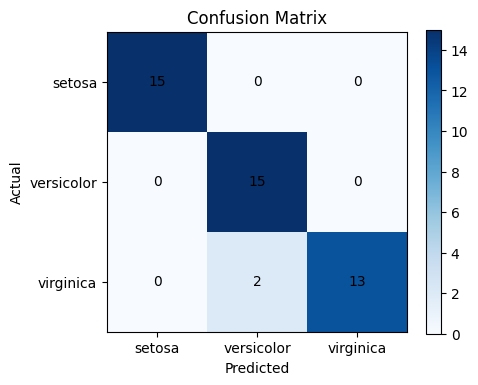

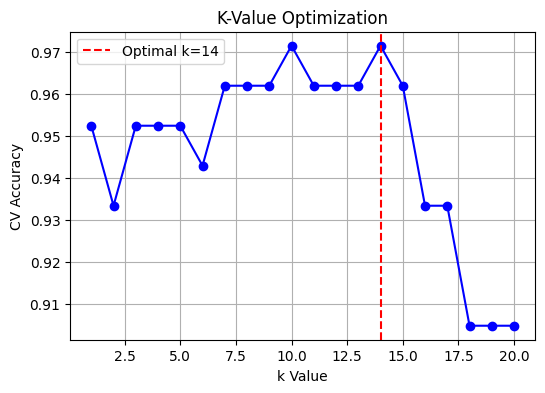

In [ ]:
# Simple KNN Classification on Iris Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load and prepare data
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find optimal k
k_range = range(1, 21)
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train_scaled, y_train, cv=5).mean() for k in k_range]
optimal_k = k_range[np.argmax(cv_scores)]

# Train and evaluate KNN
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(f"Optimal k: {optimal_k}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(iris.target_names)), iris.target_names)
plt.yticks(np.arange(len(iris.target_names)), iris.target_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

# k-value optimization curve
plt.figure(figsize=(6,4))
plt.plot(k_range, cv_scores, 'bo-')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel('k Value')
plt.ylabel('CV Accuracy')
plt.title('K-Value Optimization')
plt.legend()
plt.grid(True)
plt.show()

This code loads the Iris dataset, splits it, scales the features, and then uses K-Nearest Neighbors (KNN) for classification. It finds the best 'k' value using cross-validation, trains the KNN model, evaluates its accuracy and shows a confusion matrix. It also plots the cross-validation accuracy for different 'k' values.

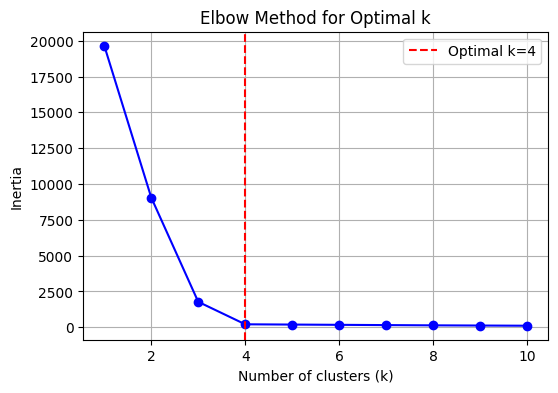

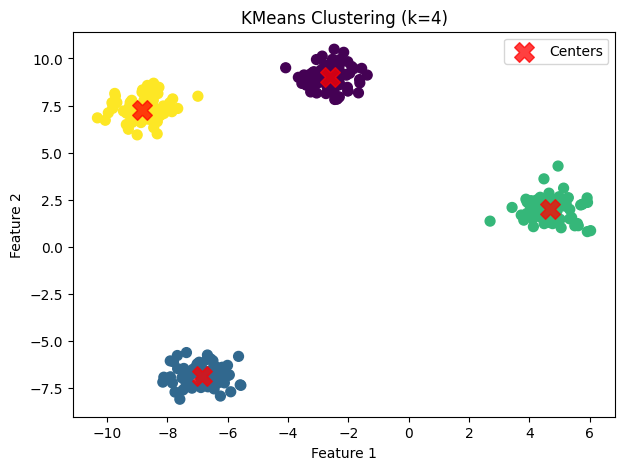

Silhouette Score (k=4): 0.876


In [ ]:
# Simple KMeans Clustering Example
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, 'bo-')
plt.axvline(x=4, color='red', linestyle='--', label='Optimal k=4')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.grid(True)
plt.show()

# Fit KMeans with optimal k (choose visually, e.g., k=4)
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42)
labels = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centers')
plt.title(f'KMeans Clustering (k={k_opt})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Silhouette score
score = silhouette_score(X, labels)
print(f'Silhouette Score (k={k_opt}): {score:.3f}')

This cell demonstrates a simple KMeans clustering example using synthetic data. It uses the elbow method to help find the optimal number of clusters (k), fits the KMeans model with the chosen k, visualizes the clusters and their centers, and calculates the silhouette score to evaluate the clustering.

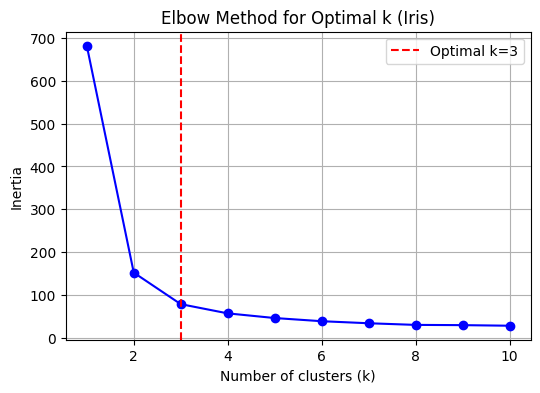

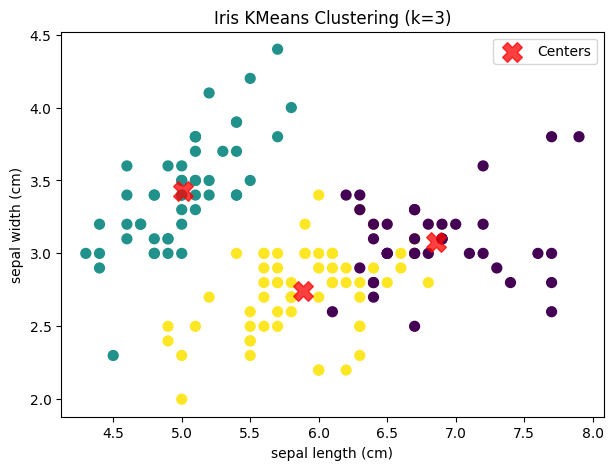

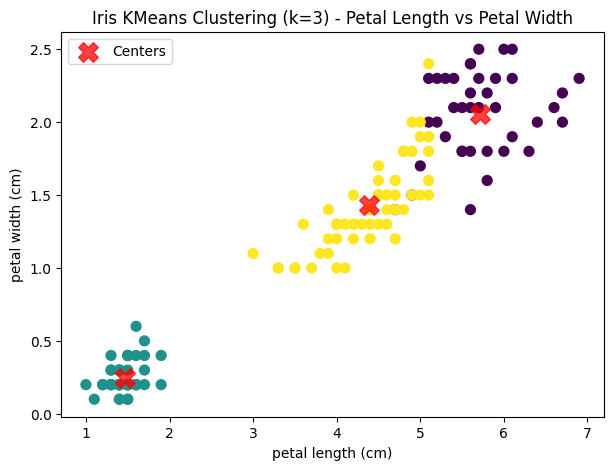

Silhouette Score (k=3): 0.551
Cluster 0: 39 data points
Cluster 1: 50 data points
Cluster 2: 61 data points

Cluster feature means:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                 6.853846          3.076923           5.715385   
1                 5.006000          3.428000           1.462000   
2                 5.883607          2.740984           4.388525   

         petal width (cm)  
cluster                    
0                2.053846  
1                0.246000  
2                1.434426  


In [ ]:
# KMeans Clustering on Iris Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Load Iris data
iris = load_iris()
X = iris.data

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
k_opt = 3  # Set optimal k explicitly for Iris data
plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, 'bo-')
plt.axvline(x=k_opt, color='red', linestyle='--', label='Optimal k=3')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Iris)')
plt.legend()
plt.grid(True)
plt.show()

# Fit KMeans with optimal k (choose visually, e.g., k=3)
kmeans = KMeans(n_clusters=k_opt, random_state=42)
labels = kmeans.fit_predict(X)

# Plot clusters (using first two features for visualization)
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centers')
plt.title(f'Iris KMeans Clustering (k={k_opt})')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

# Plot clusters (using petal length and petal width for visualization)
plt.figure(figsize=(7,5))
plt.scatter(X[:, 2], X[:, 3], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', s=200, alpha=0.75, marker='X', label='Centers')
plt.title(f'Iris KMeans Clustering (k={k_opt}) - Petal Length vs Petal Width')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend()
plt.show()

# Silhouette score
score = silhouette_score(X, labels)
print(f'Silhouette Score (k={k_opt}): {score:.3f}')

# Number of observations in each cluster
unique, counts = np.unique(labels, return_counts=True)
for i, count in zip(unique, counts):
    print(f"Cluster {i}: {count} data points")

# Descriptive summary of each cluster (mean feature values)
df = pd.DataFrame(X, columns=iris.feature_names)
df['cluster'] = labels
print("\nCluster feature means:")
print(df.groupby('cluster').mean())

This cell loads the Iris dataset, applies KMeans clustering to it, and uses the elbow method to help find the optimal number of clusters (which is set to 3 for this dataset). It then visualizes the clusters using different pairs of features and calculates the silhouette score to evaluate the clustering. Finally, it provides a summary of the number of data points and the mean feature values within each cluster.

Inertia =  ∑_{i=1}^{n} ||x_i - c_{j^*}||^2

Formula of inertia also called as wcss(with in cluster sum of squares)
used to find out the error in the clusters created

In [1]:
import pandas as pd
df = pd.read_csv('/content/Retail_Data.csv')

In [2]:
df.head()

,Trans_ID,Product1,Product2,Product3
0,1485,Bread,Butter,Egg
1,1147,Bread,Butter,Egg
2,1445,Bread,Butter,Egg
3,493,Bread,Butter,Egg
4,163,Bread,Butter,Egg


In [3]:
df = df.iloc[:,1:]

In [4]:
df.head()

,Product1,Product2,Product3
0,Bread,Butter,Egg
1,Bread,Butter,Egg
2,Bread,Butter,Egg
3,Bread,Butter,Egg
4,Bread,Butter,Egg


In [5]:
df1 = pd.get_dummies(df)

In [6]:
df1.head()

,Product1_Bread,Product1_Fruits,Product1_Juice,Product1_Nachos,Product2_Butter,Product2_JAM,Product2_Jam,Product2_Salsa,Product2_Vegetable,Product3_Dairy,Product3_Egg,Product3_Salad
0,True,False,False,False,True,False,False,False,False,False,True,False
1,True,False,False,False,True,False,False,False,False,False,True,False
2,True,False,False,False,True,False,False,False,False,False,True,False
3,True,False,False,False,True,False,False,False,False,False,True,False
4,True,False,False,False,True,False,False,False,False,False,True,False


In [7]:
df1.shape

(2000, 12)

In [11]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [13]:
frequent_items = apriori(df1,min_support = 0.05,use_colnames = True)

In [14]:
rules = association_rules(frequent_items, metric = "lift", min_threshold =1 )
type(rules)
rules.shape

(70, 14)

In [15]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Product1_Bread),(Product2_Butter),0.3510,0.2465,0.2145,0.611111,2.479153,1.0,0.127978,1.937571,0.919316,0.560052,0.483890,0.740647
1,(Product2_Butter),(Product1_Bread),0.2465,0.3510,0.2145,0.870183,2.479153,1.0,0.127978,4.999328,0.791820,0.560052,0.799973,0.740647
2,(Product2_Jam),(Product1_Bread),0.3290,0.3510,0.1280,0.389058,1.108427,1.0,0.012521,1.062294,0.145783,0.231884,0.058641,0.376865
3,(Product1_Bread),(Product2_Jam),0.3510,0.3290,0.1280,0.364672,1.108427,1.0,0.012521,1.056148,0.150725,0.231884,0.053163,0.376865
4,(Product3_Dairy),(Product1_Bread),0.2030,0.3510,0.1005,0.495074,1.410467,1.0,0.029247,1.285337,0.365138,0.221610,0.221994,0.390699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,"(Product1_Nachos, Product3_Egg)",(Product2_Salsa),0.1175,0.1965,0.1175,1.000000,5.089059,1.0,0.094411,inf,0.910482,0.597964,1.000000,0.798982
66,"(Product2_Salsa, Product3_Egg)",(Product1_Nachos),0.1175,0.2200,0.1175,1.000000,4.545455,1.0,0.091650,inf,0.883853,0.534091,1.000000,0.767045
67,(Product1_Nachos),"(Product2_Salsa, Product3_Egg)",0.2200,0.1175,0.1175,0.534091,4.545455,1.0,0.091650,1.894146,1.000000,0.534091,0.472058,0.767045
68,(Product2_Salsa),"(Product1_Nachos, Product3_Egg)",0.1965,0.1175,0.1175,0.597964,5.089059,1.0,0.094411,2.195079,1.000000,0.597964,0.544436,0.798982


In [17]:
rules.sort_values('support',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
27,(Product3_Egg),(Product2_Jam),0.5760,0.3290,0.2570,0.446181,1.356172,1.0,0.067496,1.211586,0.619411,0.396605,0.174636,0.613668
26,(Product2_Jam),(Product3_Egg),0.3290,0.5760,0.2570,0.781155,1.356172,1.0,0.067496,1.937444,0.391401,0.396605,0.483856,0.613668
7,(Product3_Egg),(Product1_Bread),0.5760,0.3510,0.2505,0.434896,1.239019,1.0,0.048324,1.148461,0.454977,0.370288,0.129269,0.574286
6,(Product1_Bread),(Product3_Egg),0.3510,0.5760,0.2505,0.713675,1.239019,1.0,0.048324,1.480836,0.297242,0.370288,0.324706,0.574286
0,(Product1_Bread),(Product2_Butter),0.3510,0.2465,0.2145,0.611111,2.479153,1.0,0.127978,1.937571,0.919316,0.560052,0.483890,0.740647
1,(Product2_Butter),(Product1_Bread),0.2465,0.3510,0.2145,0.870183,2.479153,1.0,0.127978,4.999328,0.791820,0.560052,0.799973,0.740647
33,(Product2_Vegetable),(Product3_Salad),0.2160,0.2210,0.2090,0.967593,4.378247,1.0,0.161264,24.037714,0.984181,0.916667,0.958399,0.956647
32,(Product3_Salad),(Product2_Vegetable),0.2210,0.2160,0.2090,0.945701,4.378247,1.0,0.161264,14.438667,0.990498,0.916667,0.930742,0.956647
15,(Product3_Egg),(Product1_Juice),0.5760,0.2465,0.2080,0.361111,1.464954,1.0,0.066016,1.179391,0.748549,0.338487,0.152105,0.602462
14,(Product1_Juice),(Product3_Egg),0.2465,0.5760,0.2080,0.843813,1.464954,1.0,0.066016,2.714701,0.421214,0.338487,0.631635,0.602462


In [18]:
rules.sort_values('confidence',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
52,"(Product2_Jam, Product1_Juice)",(Product3_Egg),0.2010,0.5760,0.2010,1.000000,1.736111,1.0,0.085224,inf,0.530663,0.348958,1.000000,0.674479
66,"(Product2_Salsa, Product3_Egg)",(Product1_Nachos),0.1175,0.2200,0.1175,1.000000,4.545455,1.0,0.091650,inf,0.883853,0.534091,1.000000,0.767045
65,"(Product1_Nachos, Product3_Egg)",(Product2_Salsa),0.1175,0.1965,0.1175,1.000000,5.089059,1.0,0.094411,inf,0.910482,0.597964,1.000000,0.798982
48,"(Product2_Vegetable, Product1_Fruits)",(Product3_Salad),0.1705,0.2210,0.1705,1.000000,4.524887,1.0,0.132820,inf,0.939120,0.771493,1.000000,0.885747
36,"(Product2_Butter, Product3_Egg)",(Product1_Bread),0.1945,0.3510,0.1945,1.000000,2.849003,1.0,0.126231,inf,0.805711,0.554131,1.000000,0.777066
11,(Product1_Fruits),(Product3_Salad),0.1825,0.2210,0.1825,1.000000,4.524887,1.0,0.142168,inf,0.952905,0.825792,1.000000,0.912896
41,"(Product3_Dairy, Product2_Jam)",(Product1_Bread),0.0720,0.3510,0.0720,1.000000,2.849003,1.0,0.046728,inf,0.699353,0.205128,1.000000,0.602564
33,(Product2_Vegetable),(Product3_Salad),0.2160,0.2210,0.2090,0.967593,4.378247,1.0,0.161264,24.037714,0.984181,0.916667,0.958399,0.956647
54,"(Product1_Juice, Product3_Egg)",(Product2_Jam),0.2080,0.3290,0.2010,0.966346,2.937222,1.0,0.132568,19.938286,0.832755,0.598214,0.949845,0.788644
17,(Product2_Salsa),(Product1_Nachos),0.1965,0.2200,0.1880,0.956743,4.348832,1.0,0.144770,18.031765,0.958374,0.822757,0.944542,0.905644


In [19]:
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
65,"(Product1_Nachos, Product3_Egg)",(Product2_Salsa),0.1175,0.1965,0.1175,1.000000,5.089059,1.0,0.094411,inf,0.910482,0.597964,1.000000,0.798982
68,(Product2_Salsa),"(Product1_Nachos, Product3_Egg)",0.1965,0.1175,0.1175,0.597964,5.089059,1.0,0.094411,2.195079,1.000000,0.597964,0.544436,0.798982
66,"(Product2_Salsa, Product3_Egg)",(Product1_Nachos),0.1175,0.2200,0.1175,1.000000,4.545455,1.0,0.091650,inf,0.883853,0.534091,1.000000,0.767045
67,(Product1_Nachos),"(Product2_Salsa, Product3_Egg)",0.2200,0.1175,0.1175,0.534091,4.545455,1.0,0.091650,1.894146,1.000000,0.534091,0.472058,0.767045
10,(Product3_Salad),(Product1_Fruits),0.2210,0.1825,0.1825,0.825792,4.524887,1.0,0.142168,4.692662,1.000000,0.825792,0.786901,0.912896
11,(Product1_Fruits),(Product3_Salad),0.1825,0.2210,0.1825,1.000000,4.524887,1.0,0.142168,inf,0.952905,0.825792,1.000000,0.912896
49,(Product3_Salad),"(Product2_Vegetable, Product1_Fruits)",0.2210,0.1705,0.1705,0.771493,4.524887,1.0,0.132820,3.630089,1.000000,0.771493,0.724525,0.885747
48,"(Product2_Vegetable, Product1_Fruits)",(Product3_Salad),0.1705,0.2210,0.1705,1.000000,4.524887,1.0,0.132820,inf,0.939120,0.771493,1.000000,0.885747
46,"(Product3_Salad, Product2_Vegetable)",(Product1_Fruits),0.2090,0.1825,0.1705,0.815789,4.470079,1.0,0.132358,4.437857,0.981404,0.771493,0.774666,0.875018
51,(Product1_Fruits),"(Product3_Salad, Product2_Vegetable)",0.1825,0.2090,0.1705,0.934247,4.470079,1.0,0.132358,12.029792,0.949591,0.771493,0.916873,0.875018


In [21]:
rules[(rules['lift'] >=2)&(rules['confidence'] >= 0.6) & (rules['support'] >= 0.2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Product1_Bread),(Product2_Butter),0.3510,0.2465,0.2145,0.611111,2.479153,1.0,0.127978,1.937571,0.919316,0.560052,0.483890,0.740647
1,(Product2_Butter),(Product1_Bread),0.2465,0.3510,0.2145,0.870183,2.479153,1.0,0.127978,4.999328,0.791820,0.560052,0.799973,0.740647
12,(Product2_Jam),(Product1_Juice),0.3290,0.2465,0.2010,0.610942,2.478468,1.0,0.119902,1.936730,0.889009,0.536716,0.483666,0.713179
13,(Product1_Juice),(Product2_Jam),0.2465,0.3290,0.2010,0.815416,2.478468,1.0,0.119902,3.635198,0.791672,0.536716,0.724912,0.713179
32,(Product3_Salad),(Product2_Vegetable),0.2210,0.2160,0.2090,0.945701,4.378247,1.0,0.161264,14.438667,0.990498,0.916667,0.930742,0.956647
33,(Product2_Vegetable),(Product3_Salad),0.2160,0.2210,0.2090,0.967593,4.378247,1.0,0.161264,24.037714,0.984181,0.916667,0.958399,0.956647
53,"(Product2_Jam, Product3_Egg)",(Product1_Juice),0.2570,0.2465,0.2010,0.782101,3.172824,1.0,0.137650,3.458027,0.921700,0.664463,0.710818,0.798758
54,"(Product1_Juice, Product3_Egg)",(Product2_Jam),0.2080,0.3290,0.2010,0.966346,2.937222,1.0,0.132568,19.938286,0.832755,0.598214,0.949845,0.788644
55,(Product2_Jam),"(Product1_Juice, Product3_Egg)",0.3290,0.2080,0.2010,0.610942,2.937222,1.0,0.132568,2.035688,0.982924,0.598214,0.508765,0.788644
56,(Product1_Juice),"(Product2_Jam, Product3_Egg)",0.2465,0.2570,0.2010,0.815416,3.172824,1.0,0.137650,4.025264,0.908857,0.664463,0.751569,0.798758


summary:

1.  **Load Data**: The retail transaction data is loaded from a CSV file into a pandas DataFrame.
2.  **Data Preparation**: The transaction ID column is removed, and the data is converted into a one-hot encoded format suitable for association rule mining.
3.  **Frequent Itemset Mining**: The Apriori algorithm is applied to find itemsets that frequently appear together in transactions, based on a minimum support threshold.
4.  **Association Rule Generation**: Association rules are generated from the frequent itemsets, identifying relationships between items (e.g., "if item A is bought, item B is also likely to be bought").
5.  **Rule Analysis**: The generated association rules are analyzed and sorted based on metrics like support, confidence, and lift to identify the strongest and most interesting relationships.